In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#importing libraries
import matplotlib
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
redata = pd.read_csv('census12to17wPctChangePlusSale.csv')#('census12to17wPctChange.csv')#('censuspluszillowP2.csv')
redata.head()

,Unnamed: 0,Unnamed: 0.1,Zipcode,Year,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,...,City,State,CountyName,Average,PerCapInc1213PctChange,PerCapInc1314PctChange,PerCapInc1415PctChange,PerCapInc1516PctChange,zipcode,2016newlistingsSum
0,0,0,2655,2012,3846,54.6,73323,50951,210,5.460218,...,Barnstable,MA,Barnstable County,242.416667,0.106848,0.083057,0.042928,-0.009121,2655,0
1,1,15837,2655,2013,3943,54.9,72546,56395,248,6.289627,...,Barnstable,MA,Barnstable County,257.583333,0.106848,0.083057,0.042928,-0.009121,2655,0
2,2,30088,2655,2014,3616,55.4,68965,61079,215,5.945796,...,Barnstable,MA,Barnstable County,264.250000,0.106848,0.083057,0.042928,-0.009121,2655,0
3,3,46762,2655,2015,3584,57.7,67778,63701,296,8.258929,...,Barnstable,MA,Barnstable County,265.666667,0.106848,0.083057,0.042928,-0.009121,2655,0
4,4,60073,2655,2016,3465,57.0,68684,63120,162,4.675325,...,Barnstable,MA,Barnstable County,275.416667,0.106848,0.083057,0.042928,-0.009121,2655,0


In [3]:
redata2016=redata.loc[redata["Year"]==2016]

In [4]:
redata2016.head()

,Unnamed: 0,Unnamed: 0.1,Zipcode,Year,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,...,City,State,CountyName,Average,PerCapInc1213PctChange,PerCapInc1314PctChange,PerCapInc1415PctChange,PerCapInc1516PctChange,zipcode,2016newlistingsSum
4,4,60073,2655,2016,3465,57.0,68684,63120,162,4.675325,...,Barnstable,MA,Barnstable County,275.416667,0.106848,0.083057,0.042928,-0.009121,2655,0
10,10,60074,2657,2016,2962,57.0,42228,43984,391,13.200540,...,Provincetown,MA,Barnstable County,559.250000,0.001373,0.015618,-0.065171,0.024838,2657,0
16,16,60077,2664,2016,9049,51.8,52696,32171,868,9.592220,...,Yarmouth,MA,Barnstable County,230.166667,-0.023283,-0.049627,0.046058,0.035436,2664,0
22,22,60082,2673,2016,8571,47.9,66518,34559,488,5.693618,...,Yarmouth,MA,Barnstable County,222.250000,0.046209,0.000367,0.024447,0.032167,2673,0
28,28,60084,2703,2016,44121,39.9,69732,32954,4541,10.292151,...,Attleboro,MA,Bristol County,183.166667,0.015306,0.001743,0.015017,0.046225,2703,421


In [5]:
# read in dataset with 2016 to 2017 year over year percent growth
pctgrowth=pd.read_csv('PercentageGrowthByStateCity2.csv')

In [6]:
pctgrowth.head()

,RegionID,zipcode,City,State,Metro,CountyName,SizeRank,PctChangeLast6Mos,PctChangeYOY
0,76575,43206,Columbus,OH,Columbus,Franklin County,3906,0.090909,0.384615
1,76497,43064,Plain City,OH,Columbus,Union County,7238,0.207792,0.377778
2,76482,43040,Marysville,OH,Columbus,Union County,2886,0.201493,0.364407
3,88335,69129,Chappell,NE,NaN,Deuel County,14651,0.125000,0.358491
4,88262,68939,Franklin,NE,NaN,Franklin County,14787,0.136364,0.351351


In [7]:
#merge census data 2016 -- 
mergedCensusPctGrowth=pd.merge(redata2016,pctgrowth,left_on="Zipcode", right_on="zipcode")

In [8]:
#mergedCensusPctGrowth.to_csv("mergedCensusPctGrowth.csv")

In [9]:
mergedCensusPctGrowth.head()

,Unnamed: 0,Unnamed: 0.1,Zipcode,Year,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,...,2016newlistingsSum,RegionID,zipcode_y,City_y,State_y,Metro,CountyName_y,SizeRank,PctChangeLast6Mos,PctChangeYOY
0,4,60073,2655,2016,3465,57.0,68684,63120,162,4.675325,...,0,58845,2655,Barnstable,MA,Barnstable Town,Barnstable County,9766,-0.008876,0.033951
1,10,60074,2657,2016,2962,57.0,42228,43984,391,13.200540,...,0,58846,2657,Provincetown,MA,Barnstable Town,Barnstable County,8685,0.001385,0.034335
2,16,60077,2664,2016,9049,51.8,52696,32171,868,9.592220,...,0,58852,2664,Yarmouth,MA,Barnstable Town,Barnstable County,6635,-0.003610,0.037594
3,22,60082,2673,2016,8571,47.9,66518,34559,488,5.693618,...,0,58860,2673,Yarmouth,MA,Barnstable Town,Barnstable County,7262,-0.007299,0.038168
4,28,60084,2703,2016,44121,39.9,69732,32954,4541,10.292151,...,421,58863,2703,Attleboro,MA,Providence-Warwick,Bristol County,1114,0.018692,0.038095


In [10]:
mergedCensusPctGrowth_GA2=mergedCensusPctGrowth.loc[mergedCensusPctGrowth["State_y"]=="WA"]

In [11]:
mergedCensusPctGrowth_GA2.City_y=mergedCensusPctGrowth_GA2.City_y.str.replace(" ","_")#strip()#replace(" ", "")

/Users/serenaleung/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [12]:
mergedCensusPctGrowth_GA2.CountyName_y=mergedCensusPctGrowth_GA2.CountyName_y.str.replace(" ","_")#strip()

In [13]:
mergedCensusPctGrowth_GA2.head(20)

,Unnamed: 0,Unnamed: 0.1,Zipcode,Year,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,...,2016newlistingsSum,RegionID,zipcode_y,City_y,State_y,Metro,CountyName_y,SizeRank,PctChangeLast6Mos,PctChangeYOY
6746,40484,72557,98001,2016,31664,38.8,73782,30504,3574,11.287266,...,467,99489,98001,Auburn,WA,Seattle-Tacoma-Bellevue,King_County,3632,0.000000,0.004785
6747,40490,72558,98002,2016,33991,35.4,47184,22018,6856,20.170045,...,0,99490,98002,Auburn,WA,Seattle-Tacoma-Bellevue,King_County,2368,-0.004608,0.009346
6748,40496,72559,98003,2016,47407,35.3,48724,25704,8010,16.896239,...,0,99491,98003,Federal_Way,WA,Seattle-Tacoma-Bellevue,King_County,883,-0.004739,0.014493
6749,40502,72560,98004,2016,33124,38.4,108905,76700,2226,6.720203,...,0,99492,98004,Bellevue,WA,Seattle-Tacoma-Bellevue,King_County,1027,-0.038067,-0.028107
6750,40508,72561,98005,2016,18059,37.7,96767,55777,1201,6.650424,...,0,99493,98005,Bellevue,WA,Seattle-Tacoma-Bellevue,King_County,5449,-0.039419,-0.014894
6751,40514,72562,98006,2016,37819,43.5,120649,57187,1823,4.820328,...,0,99494,98006,Bellevue,WA,Seattle-Tacoma-Bellevue,King_County,2240,-0.032787,-0.032787
6752,40520,72563,98007,2016,27050,32.3,85524,41250,3093,11.434381,...,0,99495,98007,Bellevue,WA,Seattle-Tacoma-Bellevue,King_County,3482,-0.033735,-0.026699
6753,40526,72564,98008,2016,24763,42.4,87536,46438,2033,8.209829,...,0,99496,98008,Bellevue,WA,Seattle-Tacoma-Bellevue,King_County,4636,-0.031963,-0.031963
6754,40532,72565,98010,2016,5143,42.2,73302,37287,433,8.419211,...,0,99498,98010,Black_Diamond,WA,Seattle-Tacoma-Bellevue,King_County,10606,-0.004016,0.000000
6755,40538,72566,98011,2016,31674,38.4,82702,41819,2008,6.339585,...,0,99499,98011,Bothell,WA,Seattle-Tacoma-Bellevue,Snohomish_County,3848,-0.029762,-0.029762


In [37]:
# Attempt number3: remove "Household Income", "Poverty Count", since this duplicates info from per capita inc and poverty rate
X = mergedCensusPctGrowth_GA2[["Population", "Median Age",  "Per Capita Income",  "Poverty Rate","CountyName_y", "State_y","2016newlistingsSum"]]#,"PerCapInc1213PctChange","PerCapInc1314PctChange","PerCapInc1415PctChange","PerCapInc1516PctChange"]] #, "City_y"
y = mergedCensusPctGrowth_GA2["PctChangeYOY"].values.reshape(-1, 1) 
print(X.shape, y.shape)

(224, 7) (224, 1)


In [38]:
X.describe()

,Population,Median Age,Per Capita Income,Poverty Rate,2016newlistingsSum
count,224.000000,224.000000,224.00000,224.000000,224.000000
mean,27097.370536,39.161607,34347.28125,11.948052,55.687500
std,12421.276905,5.954698,12302.33736,5.805004,177.564921
min,3108.000000,22.100000,16697.00000,1.830351,0.000000
25%,19422.000000,35.800000,25787.00000,7.560453,0.000000
50%,25876.000000,38.200000,30816.00000,11.024054,0.000000
75%,34320.500000,41.725000,39088.00000,15.392099,0.000000
max,76388.000000,63.000000,85148.00000,33.753851,1007.000000


In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 6746 to 6969
Data columns (total 7 columns):
Population            224 non-null int64
Median Age            224 non-null float64
Per Capita Income     224 non-null int64
Poverty Rate          224 non-null float64
CountyName_y          224 non-null object
State_y               224 non-null object
2016newlistingsSum    224 non-null int64
dtypes: float64(2), int64(3), object(2)
memory usage: 14.0+ KB


In [40]:
# make a copy of the data
data = X.copy()

In [41]:
# check counts
data.count()

Population            224
Median Age            224
Per Capita Income     224
Poverty Rate          224
CountyName_y          224
State_y               224
2016newlistingsSum    224
dtype: int64

In [42]:
# check for nulls
data.isna().count()

Population            224
Median Age            224
Per Capita Income     224
Poverty Rate          224
CountyName_y          224
State_y               224
2016newlistingsSum    224
dtype: int64

In [43]:
data.head()

,Population,Median Age,Per Capita Income,Poverty Rate,CountyName_y,State_y,2016newlistingsSum
6746,31664,38.8,30504,11.287266,King_County,WA,467
6747,33991,35.4,22018,20.170045,King_County,WA,0
6748,47407,35.3,25704,16.896239,King_County,WA,0
6749,33124,38.4,76700,6.720203,King_County,WA,0
6750,18059,37.7,55777,6.650424,King_County,WA,0


In [44]:
# take care of missing
data["Population"]=data["Population"].fillna(data["Population"].mean())
data["Median Age"]=data["Median Age"].fillna(data["Median Age"].mean())
data["Per Capita Income"]=data["Per Capita Income"].fillna(data["Per Capita Income"].mean())

data["CountyName_y"]=data["CountyName_y"].fillna("None")
data["State_y"]=data["State_y"].fillna("None")

#data["PerCapInc1213PctChange"]=data["PerCapInc1213PctChange"].fillna(data["PerCapInc1213PctChange"].mean())
#data["PerCapInc1314PctChange"]=data["PerCapInc1314PctChange"].fillna(data["PerCapInc1314PctChange"].mean())
#data["PerCapInc1415PctChange"]=data["PerCapInc1415PctChange"].fillna(data["PerCapInc1415PctChange"].mean())
#data["PerCapInc1516PctChange"]=data["PerCapInc1516PctChange"].fillna(data["PerCapInc1516PctChange"].mean())

In [45]:
# encode binary variables 
data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.head()

,Population,Median Age,Per Capita Income,Poverty Rate,2016newlistingsSum,CountyName_y_Asotin_County,CountyName_y_Benton_County,CountyName_y_Chelan_County,CountyName_y_Clallam_County,CountyName_y_Clark_County,...,CountyName_y_Skagit_County,CountyName_y_Snohomish_County,CountyName_y_Spokane_County,CountyName_y_Stevens_County,CountyName_y_Thurston_County,CountyName_y_Walla_Walla_County,CountyName_y_Whatcom_County,CountyName_y_Whitman_County,CountyName_y_Yakima_County,State_y_WA
6746,31664,38.8,30504,11.287266,467,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6747,33991,35.4,22018,20.170045,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6748,47407,35.3,25704,16.896239,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6749,33124,38.4,76700,6.720203,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6750,18059,37.7,55777,6.650424,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
data_binary_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 6746 to 6969
Data columns (total 35 columns):
Population                          224 non-null int64
Median Age                          224 non-null float64
Per Capita Income                   224 non-null int64
Poverty Rate                        224 non-null float64
CountyName_y_Asotin_County          224 non-null uint8
CountyName_y_Benton_County          224 non-null uint8
CountyName_y_Chelan_County          224 non-null uint8
CountyName_y_Clallam_County         224 non-null uint8
CountyName_y_Clark_County           224 non-null uint8
CountyName_y_Cowlitz_County         224 non-null uint8
CountyName_y_Douglas_County         224 non-null uint8
CountyName_y_Franklin_County        224 non-null uint8
CountyName_y_Grant_County           224 non-null uint8
CountyName_y_Grays_Harbor_County    224 non-null uint8
CountyName_y_Island_County          224 non-null uint8
CountyName_y_Jefferson_County       224 non-null uint8
CountyN

In [46]:
data_binary_encoded.columns

Index(['Population', 'Median Age', 'Per Capita Income', 'Poverty Rate',
       '2016newlistingsSum', 'CountyName_y_Asotin_County',
       'CountyName_y_Benton_County', 'CountyName_y_Chelan_County',
       'CountyName_y_Clallam_County', 'CountyName_y_Clark_County',
       'CountyName_y_Cowlitz_County', 'CountyName_y_Douglas_County',
       'CountyName_y_Franklin_County', 'CountyName_y_Grant_County',
       'CountyName_y_Grays_Harbor_County', 'CountyName_y_Island_County',
       'CountyName_y_Jefferson_County', 'CountyName_y_King_County',
       'CountyName_y_Kitsap_County', 'CountyName_y_Kittitas_County',
       'CountyName_y_Klickitat_County', 'CountyName_y_Lewis_County',
       'CountyName_y_Mason_County', 'CountyName_y_Pacific_County',
       'CountyName_y_Pierce_County', 'CountyName_y_San_Juan_County',
       'CountyName_y_Skagit_County', 'CountyName_y_Snohomish_County',
       'CountyName_y_Spokane_County', 'CountyName_y_Stevens_County',
       'CountyName_y_Thurston_County', 'Coun

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(data_binary_encoded, y, random_state=42)


In [49]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [50]:
model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
predicted = model.predict(X_test)

In [52]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)


In [53]:
#model.score(X, y)

training_score=model.score(X_train, y_train)

testing_score=model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")


Training Score: 0.9438663502894299
Testing Score: 0.8479395242890768


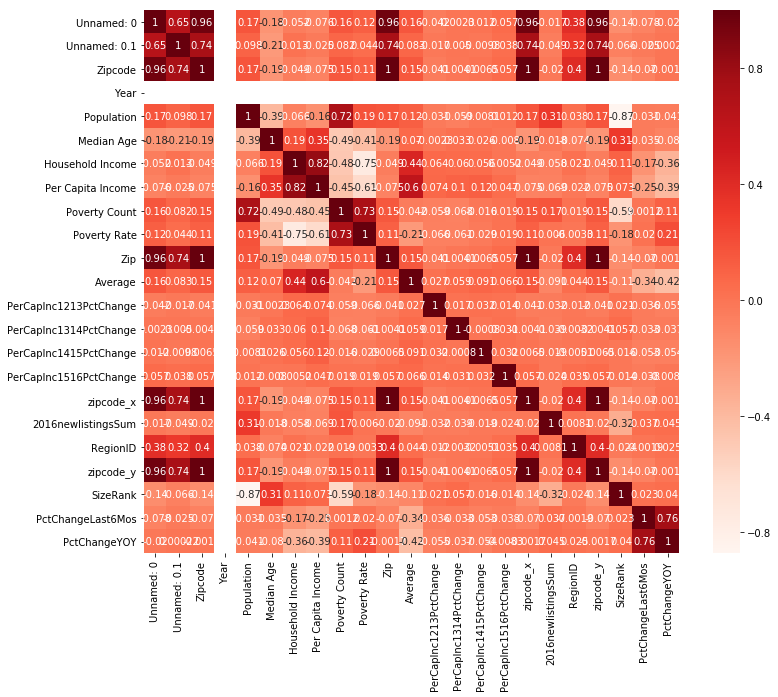

In [54]:
plt.figure(figsize=(12,10))
cor = mergedCensusPctGrowth.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [58]:
census17=pd.read_csv('census17forPrediction.csv')

In [59]:
census17.head()

,Unnamed: 0,Unnamed: 0.1,Zipcode,Year,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Zip,City,State,CountyName,Average,PerCapInc1213PctChange,PerCapInc1314PctChange,PerCapInc1415PctChange,PerCapInc1516PctChange
0,5,74960,2655,2017,3257,56.7,75000,65047,152,4.666871,2655.0,Barnstable,MA,Barnstable County,293.916667,0.106848,0.083057,0.042928,-0.009121
1,11,74961,2657,2017,2952,54.9,47500,42402,314,10.636856,2657.0,Provincetown,MA,Barnstable County,601.333333,0.001373,0.015618,-0.065171,0.024838
2,17,74962,2659,2017,1030,54.7,57540,42638,62,6.019417,2659.0,Chatham,MA,Barnstable County,328.166667,-0.041901,0.124556,0.110272,-0.051731
3,23,74963,2660,2017,6657,56.7,54924,37433,737,11.071053,2660.0,Dennis,MA,Barnstable County,253.083333,0.057428,0.108454,0.023297,0.063637
4,29,74964,2664,2017,9226,52.4,56242,33321,752,8.150878,2664.0,Yarmouth,MA,Barnstable County,247.250000,-0.023283,-0.049627,0.046058,0.035436


In [61]:
census17["State_y"]=census17["State"]

In [62]:
census17["CountyName_y"]=census17["CountyName"]

In [63]:
X17 = census17[["Population", "Median Age",  "Per Capita Income",  "Poverty Rate","CountyName_y", "State_y"]]#,"PerCapInc1213PctChange","PerCapInc1314PctChange","PerCapInc1415PctChange","PerCapInc1516PctChange"]] #, "City_y"


In [66]:
data2=X17.copy()

In [67]:
# take care of missing
data2["Population"]=data2["Population"].fillna(data2["Population"].mean())
data2["Median Age"]=data2["Median Age"].fillna(data2["Median Age"].mean())
data2["Per Capita Income"]=data2["Per Capita Income"].fillna(data2["Per Capita Income"].mean())

data2["CountyName_y"]=data2["CountyName_y"].fillna("None")
data2["State_y"]=data2["State_y"].fillna("None")


In [71]:
data2_St=data2.loc[data2["State_y"]=="WA"]

In [72]:
# encode binary variables 
data_binary_encoded2 = pd.get_dummies(data2_St)
data_binary_encoded2.head()

,Population,Median Age,Per Capita Income,Poverty Rate,CountyName_y_Adams County,CountyName_y_Asotin County,CountyName_y_Benton County,CountyName_y_Chelan County,CountyName_y_Clallam County,CountyName_y_Clark County,...,CountyName_y_Skamania County,CountyName_y_Snohomish County,CountyName_y_Spokane County,CountyName_y_Stevens County,CountyName_y_Thurston County,CountyName_y_Walla Walla County,CountyName_y_Whatcom County,CountyName_y_Whitman County,CountyName_y_Yakima County,State_y_WA
13068,32789,38.4,32021,9.975907,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13069,34255,36.5,23473,19.016202,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13070,48065,35.5,27098,15.587226,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13071,34283,37.9,81412,6.933466,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13072,18735,37.9,61125,7.312517,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [73]:
predicted = model.predict(data_binary_encoded2)

ValueError: shapes (354,38) and (36,1) not aligned: 38 (dim 1) != 36 (dim 0)